# Twitter Sentiment Analysis

## Contributors:
[Violetta Gkika](https://github.com/violett-g)<br>
[Eva Chousiada](https://github.com/evachous)

In [1]:
import pandas as pd
import numpy as np
import sys
import pickle
from nltk.corpus import stopwords
from string import punctuation
from stop_words import get_stop_words

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_location = r'/home/eva/Documents/tededom/Project/twitter_data/train2017.tsv'
train_df = pd.read_csv(train_location, sep='\t', names=['ID', 'Sentiment', 'Feeling', 'Tweets'])
train_tweets = train_df['Tweets']
train_feelings = train_df['Feeling']

outfile = open('train_tweets.pickle','wb')
pickle.dump(train_tweets, outfile)
outfile.close()

test_location = r'/home/eva/Documents/tededom/Project/twitter_data/test2017.tsv'
test_df = pd.read_csv(test_location, sep='\t', names=['ID', 'Sentiment', 'Feeling', 'Tweets'])
test_tweets = test_df['Tweets']

outfile = open('test_tweets.pickle','wb')
pickle.dump(test_tweets, outfile)
outfile.close()


# Preprocessing
In order to clean out our data, we created a function names 'preprocess' which runs through the given tweets and does the following in order:
* removes all punctuation
* converts to lower case and splits the tweet to individual words
* removes any stop-words (taken from nltk and get_stop_words libraries)
* removes any words starting with www, http or ending with com, aka removes links

As a result, we have two lists: a list of cleaned out, tokenized tweets (filtered_tweets) and a list of every word in that list (words_list). The latter is used to create a word cloud.

In [3]:
stop_words = get_stop_words('english')

def preprocess(tweets, filtered_tweets, words_list):
    for tweet in tweets:
        for p in punctuation:
            tweet=tweet.replace(p,'')
        tweet = tweet.lower().split()
        filtered_tweet = [w for w in tweet if not w in stopwords.words('english')]
        filtered_tweet = [w for w in filtered_tweet if not w in stop_words]
        filtered_tweet = [w for w in filtered_tweet if not w.startswith(('www','http'))]
        filtered_tweet = [w for w in filtered_tweet if not w.endswith(('com'))]
        filtered_tweets.append(filtered_tweet)
        for w in filtered_tweet:
            words_list.append(w)

In [4]:
filtered_train_tweets = []
train_words = []
preprocess(train_tweets, filtered_train_tweets, train_words)

outfile = open('filtered_train_tweets.pickle','wb')
pickle.dump(filtered_train_tweets, outfile)
outfile.close()

outfile = open('train_words.pickle','wb')
pickle.dump(train_words, outfile)
outfile.close()

In [5]:
filtered_test_tweets = []
test_words = []
preprocess(test_tweets, filtered_test_tweets, test_words)

outfile = open('filtered_test_tweets.pickle','wb')
pickle.dump(filtered_test_tweets, outfile)
outfile.close()

outfile = open('test_words.pickle','wb')
pickle.dump(test_words, outfile)
outfile.close()


# Visualization & data analysis
In order to better understand our data, we have used the word cloud representation, which displays our list of words according to the frequency or importance of each word. For this word cloud, we used our list of the total words in our data, regardless of the tweets' sentiment (positive, neutral or negative). ([source](https://amueller.github.io/word_cloud/auto_examples/a_new_hope.html))

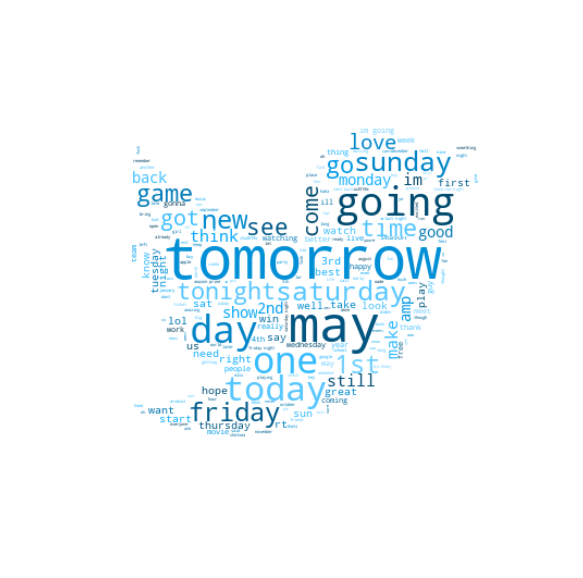

In [6]:
from wordcloud import WordCloud
from PIL import Image
import random

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 100%%, %d%%)" % random.randint(15, 75)

twitter_mask = np.array(Image.open('twitter.png'))

words = (' '.join(w.strip("'") for w in train_words))
wordcloud = WordCloud(mask=twitter_mask, max_font_size=75, max_words=200, 
                      background_color="white").generate(str(words))
wordcloud.recolor(color_func=blue_color_func)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As you can see from this word cloud, some of the most used words in our twitter data have to do with time and dates (e.g tomorrow, today, tonight, monday, tuesday etc). Also, ordinal numbers are quite common (1st, 2nd etc). Finally, we can see that basic verbs, such as go, make, think, see and come, are used frequently.

Afterwards, we calculated the frequency of words in tweets with positive, negative and neutral sentiment, and displayed this data using a barplot. (sources: [1](https://docs.python.org/2/library/collections.html), [2](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html), [3](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html), [4](http://scipy.github.io/old-wiki/pages/Cookbook/Matplotlib/Show_colormaps))

In [7]:
positive_words = []
negative_words = []
neutral_words = []

mylist = list(zip(train_feelings, filtered_train_tweets))
for feeling, tweet in mylist:
    if feeling == 'positive':
        for word in tweet:
            positive_words.append(word)
    elif feeling == 'negative':
        for word in tweet:
            negative_words.append(word)
    elif feeling == 'neutral':
        for word in tweet:
            neutral_words.append(word)

In [8]:
from collections import Counter

pos_dict = dict(Counter(positive_words))
neu_dict = dict(Counter(neutral_words))
neg_dict = dict(Counter(negative_words))

pos_data = list(zip(pos_dict.keys(), pos_dict.values()))
pos_df = pd.DataFrame(pos_data, columns=['Words','Positive'], dtype=int)

neu_data = list(zip(neu_dict.keys(), neu_dict.values()))
neu_df = pd.DataFrame(neu_data, columns=['Words','Neutral'], dtype=int)

neg_data = list(zip(neg_dict.keys(), neg_dict.values()))
neg_df = pd.DataFrame(neg_data, columns=['Words','Negative'], dtype=int)

first_df = pd.merge(pos_df, neu_df, how='outer', on=['Words', 'Words'])
all_df = pd.merge(first_df, neg_df, how='outer', on=['Words', 'Words'])
all_df = all_df.sort_values(by=['Positive', 'Neutral', 'Negative'], ascending=False)
all_df = all_df.set_index('Words')
all_df

,Positive,Neutral,Negative
Words,,,
tomorrow,2044.0,1655.0,605.0
may,1178.0,1149.0,646.0
day,1147.0,781.0,280.0
see,920.0,543.0,184.0
night,859.0,696.0,194.0
good,846.0,84.0,84.0
going,821.0,945.0,316.0
im,748.0,550.0,336.0
friday,667.0,623.0,143.0


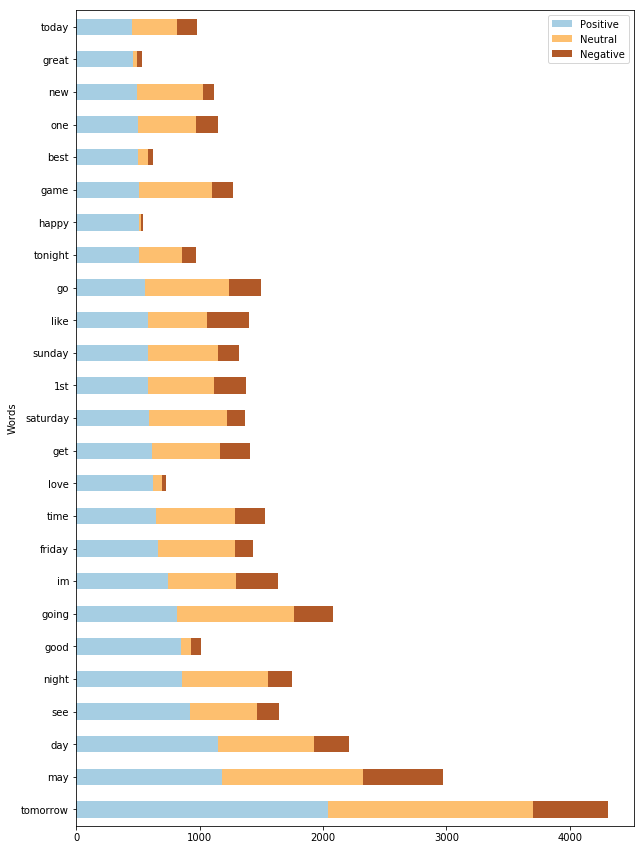

In [9]:
mydf = all_df[:25]      # we chose to display the first 25 most used words
mydf.plot.barh(figsize=(10,15), colormap='Paired', stacked=True)
#mydf.plot.barh(figsize=(10,15), colormap='Paired')


# Vectorization

## Bag-of-words:

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
bow_train = bow_vectorizer.fit_transform(train_tweets)  #TWEETS : a list with the actual tweet

outfile = open('bow_train.pickle','wb')
pickle.dump(bow_train, outfile)
outfile.close()

In [11]:
bow_test = bow_vectorizer.fit_transform(test_tweets)

outfile = open('bow_test.pickle','wb')
pickle.dump(bow_test, outfile)
outfile.close()

## TFIDF:

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
tfidf_train = tfidf_vectorizer.fit_transform(train_tweets)

outfile = open('tfidf_train.pickle','wb')
pickle.dump(tfidf_train, outfile)
outfile.close()

In [13]:
tfidf_test = tfidf_vectorizer.fit_transform(test_tweets)

outfile = open('tfidf_test.pickle','wb')
pickle.dump(tfidf_test, outfile)
outfile.close()

## Word2Vec:

In [14]:
import gensim

model_w2v_plot = gensim.models.Word2Vec(    #model trained only for tsne plot
            filtered_train_tweets,
            size=300, # desired no. of features/independent variables
            window=5, # context window size
            min_count=160,  # increased for more selective model
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v_plot.train(filtered_train_tweets, total_examples= len(train_tweets), epochs=20)

(1553592, 6507880)

/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


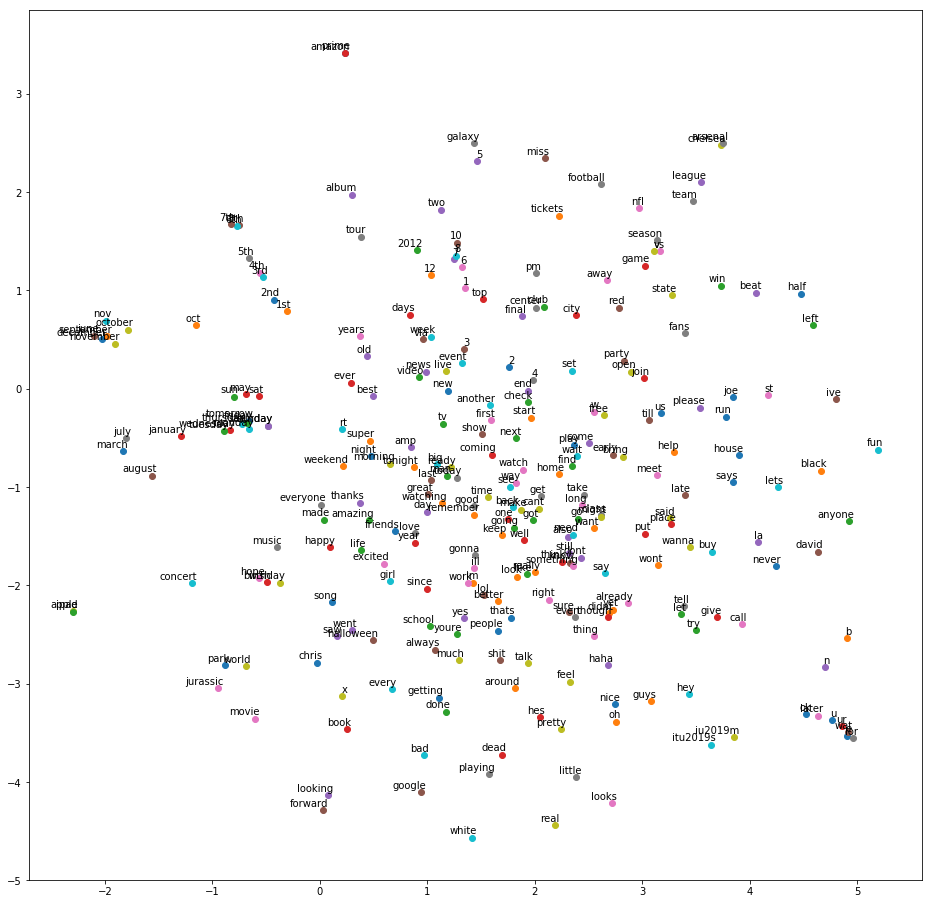

In [15]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
    
tsne_plot(model_w2v_plot)

In [16]:
w2v_tweets = train_tweets.apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            w2v_tweets,
            size=300,
            window=5,
            min_count=2,
            sg = 1,
            hs = 0,
            negative = 10,
            workers= 2,
            seed = 34) 

model_w2v.train(w2v_tweets, total_examples= len(train_tweets), epochs=20)

outfile = open('model_w2v.pickle','wb')
pickle.dump(model_w2v, outfile)
outfile.close()

In [17]:
def mean_vec(model, tweet):    #calculates the mean value of all words that are in a given tweet
    words_array = []
    missing = 0
    if len(tweet) == 0:    #for filtered tweets that have zero words, create random features
        words_array.append(np.random.uniform(-1, 1, 300))  #size of features is 300

    for word in tweet:
        if word not in model:  #if word is not found in the vocabulary made from word2vec
            missing += 1
        else:
            words_array.append(model.wv[word])

    for i in range(missing):
        if not words_array:  #if no words in the tweet are found in the vocab, create random features
            words_array.append(np.random.uniform(-1, 1, 300))
        else:
            words_array.append(np.array(words_array).mean(axis=0))

    tweet_mean = np.array(words_array).mean(axis=0)
    return tweet_mean

In [18]:
train_vectors = []
for tweet in train_tweets:
    tweet_vec = mean_vec(model_w2v, tweet)
    train_vectors.append(tweet_vec)

outfile = open('train_vectors.pickle','wb')
pickle.dump(train_vectors, outfile)
outfile.close()

/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


In [19]:
train_vector_data = list(zip(train_df['ID'], train_vectors))
train_vector_df = pd.DataFrame(train_vector_data, columns=['ID','Vector'], dtype=float)
train_vector_df

,ID,Vector
0,2.641838e+17,"[0.0068892743, -0.03795782, -0.09353106, -0.00..."
1,2.634051e+17,"[0.010228092, -0.09148367, -0.09318672, 0.1210..."
2,2.621632e+17,"[0.024410997, -0.05366963, -0.08121122, 0.1347..."
3,2.642493e+17,"[0.05312762, -0.079478934, -0.1252987, 0.08251..."
4,2.626820e+17,"[0.0025416126, -0.0033105002, -0.08522777, 0.0..."
5,2.642296e+17,"[0.027797231, -0.050269924, -0.05974941, 0.117..."
6,2.641058e+17,"[0.023065621, -0.048375677, -0.087203756, 0.10..."
7,2.640946e+17,"[-0.0072426684, -0.0169746, -0.08681623, 0.076..."
8,2.123925e+17,"[0.028385906, -0.08889837, -0.07300954, 0.0692..."
9,2.549418e+17,"[0.028937649, -0.094832644, -0.08807887, 0.071..."


In [20]:
test_vectors = []
for tweet in test_tweets:
    test_tweet_vec = mean_vec(model_w2v, tweet)
    test_vectors.append(test_tweet_vec)

outfile = open('test_vectors.pickle','wb')
pickle.dump(test_vectors, outfile)
outfile.close()

/home/eva/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


In [21]:
test_vector_data = list(zip(test_df['ID'], test_vectors))
test_vector_df = pd.DataFrame(test_vector_data, columns=['ID','Vector'], dtype=float)
test_vector_df

,ID,Vector
0,8.019891e+17,"[0.032389443, -0.045460224, -0.040475283, 0.00..."
1,8.019893e+17,"[0.07088516, -0.10241314, -0.058055334, 0.0211..."
2,8.019910e+17,"[0.034788195, -0.08576174, -0.085645206, 0.053..."
3,8.019962e+17,"[0.021956718, -0.060139287, -0.06863646, 0.017..."
4,8.019983e+17,"[0.034228496, -0.059487227, -0.113796145, 0.01..."
5,8.020017e+17,"[0.028198183, -0.051939134, -0.15325612, 0.005..."
6,8.020034e+17,"[0.02416116, -0.061988458, -0.07333309, 0.0270..."
7,8.020148e+17,"[-0.011186121, -0.028101718, -0.04156235, 0.05..."
8,8.020206e+17,"[0.010875104, -0.087943874, -0.123308726, 0.01..."
9,8.020211e+17,"[0.010410418, -0.048319705, -0.07316313, 0.013..."



# Classification

In [22]:
gold_location = r'/home/eva/Documents/tededom/Project/twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt'
gold_df = pd.read_csv(gold_location, sep='\t', names=['ID', 'Feeling'])   #correct test sentiments
gold = gold_df['Feeling']

## SVM:

In [23]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True)

In [24]:
svc_bow = svc.fit(bow_train, train_feelings)        # bow
svc_bow_pred = svc_bow.predict(bow_test)

acc_svc_bow = metrics.accuracy_score(gold, svc_bow_pred)
f1_svc_bow = f1_score(gold, svc_bow_pred, average='macro')

In [25]:
svc_tfidf = svc.fit(tfidf_train, train_feelings)    # tfidf
svc_tfidf_pred = svc_tfidf.predict(tfidf_test)

acc_svc_tfidf = metrics.accuracy_score(gold, svc_tfidf_pred)
f1_svc_tfidf = f1_score(gold, svc_tfidf_pred, average='macro')

In [26]:
svc_w2v = svc.fit(train_vectors, train_feelings)     # w2v
svc_w2v_pred = svc_w2v.predict(test_vectors)

acc_svc_w2v = metrics.accuracy_score(gold, svc_w2v_pred)
f1_svc_w2v = f1_score(gold, svc_w2v_pred, average='macro')

/home/eva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## KNN:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn_bow = knn.fit(bow_train, train_feelings)              # bow
knn_bow_pred = knn_bow.predict(bow_test)

acc_knn_bow = metrics.accuracy_score(gold, knn_bow_pred)
f1_knn_bow = f1_score(gold, knn_bow_pred, average='macro')

In [28]:
knn_tfidf = knn.fit(tfidf_train, train_feelings)          # tfidf
knn_tfidf_pred = knn_tfidf.predict(tfidf_test)

acc_knn_tfidf = metrics.accuracy_score(gold, knn_tfidf_pred)
f1_knn_tfidf = f1_score(gold, knn_tfidf_pred, average='macro')

In [29]:
knn_w2v = knn.fit(train_vectors, train_feelings)           # w2v
knn_w2v_pred = knn_w2v.predict(test_vectors)

acc_knn_w2v = metrics.accuracy_score(gold, knn_w2v_pred)
f1_knn_w2v = f1_score(gold, knn_w2v_pred, average='macro')

In [30]:
data = [['SVM', acc_svc_bow, f1_svc_bow, acc_svc_tfidf, f1_svc_tfidf, acc_svc_w2v, f1_svc_w2v],
        ['KNN', acc_knn_bow, f1_knn_bow, acc_knn_tfidf, f1_knn_tfidf, acc_knn_w2v, f1_knn_w2v]]

df = pd.DataFrame(data, columns=['', 'BOW_Accuracy', 'BOW_F1', 'TFIDF_Accuracy', 'TFIDF_F1', 'W2V_Accuracy', 'W2V_F1'])
df = df.set_index('')
df

,BOW_Accuracy,BOW_F1,TFIDF_Accuracy,TFIDF_F1,W2V_Accuracy,W2V_F1
,,,,,,
SVM,0.410534,0.330911,0.402800,0.314815,0.416070,0.313668
KNN,0.416640,0.351658,0.414035,0.306403,0.357538,0.338242


We conclude that the word2vec method has the best results. With additional pre-trained word embeddings, the w2v scores could improve even more. Furthermore, KNN has less accurate predictions than SVM, as expected.


# Adding features with lexica
Using the given lexica, we added features to both our train and test vectors generated from word2vec. Firstly, we calculated the mean valence of each tweet, and repeated this process for every lexicon. As a result, our total features increased from 300 to 305.

In [31]:
def open_file(filename):
    file = open(filename, 'r')
    dict = {}
    for line in file:
        list = line.strip().split('\t')
        dict[list[0]] = list[1]
    file.close()
    return dict

affin = open_file('/home/eva/Documents/tededom/Project/lexica/affin/affin.txt')
emotweet = open_file('/home/eva/Documents/tededom/Project/lexica/emotweet/valence_tweet.txt')
generic = open_file('/home/eva/Documents/tededom/Project/lexica/generic/generic.txt')
nrc = open_file('/home/eva/Documents/tededom/Project/lexica/nrc/val.txt')
nrctag = open_file('/home/eva/Documents/tededom/Project/lexica/nrctag/val.txt')

In [32]:
def lex_mean(tweets, vec, lex):
    count = 0
    mean = 0.0
    for i in range(len(tweets)):
        for word in tweets[i]:
            if word in lex.keys():
                count += 1
                mean += float(lex[word])
        if count == 0:
            vec[i] = np.append(vec[i], mean)
        else:
            vec[i] = np.append(vec[i], mean/count)

In [33]:
lex_mean(train_tweets, train_vectors, affin)
lex_mean(train_tweets, train_vectors, emotweet)
lex_mean(train_tweets, train_vectors, generic)
lex_mean(train_tweets, train_vectors, nrc)
lex_mean(train_tweets, train_vectors, nrctag)

lex_mean(test_tweets, test_vectors, affin)
lex_mean(test_tweets, test_vectors, emotweet)
lex_mean(test_tweets, test_vectors, generic)
lex_mean(test_tweets, test_vectors, nrc)
lex_mean(test_tweets, test_vectors, nrctag)

print('Number of features: ', len(train_vectors[0]))

Number of features:  305


We also calculated the maximum and minimum valence of every tweet's words, and added these features to our vectors. For this process, we decided to use only 2 of the 5 given lexica, in particular emotweet and generic, because the range of the words' values was more appropriate.

In [34]:
def lex_max(tweets, vec, lex):
    max_val = 0.0
    for i in range(len(tweets)):
        for word in tweets[i]:
            if word in lex.keys() and float(lex[word]) >= max_val:
                max_val = float(lex[word])
        vec[i] = np.append(vec[i], max_val)
        
lex_max(train_tweets, train_vectors, emotweet)
lex_max(train_tweets, train_vectors, generic)

lex_max(test_tweets, test_vectors, emotweet)
lex_max(test_tweets, test_vectors, generic)

print('Number of features: ', len(train_vectors[0]))

Number of features:  307


In [35]:
def lex_min(tweets, vec, lex):
    min_val = 100.0
    for i in range(len(tweets)):
        for word in tweets[i]:
            if word in lex.keys() and float(lex[word]) <= min_val:
                min_val = float(lex[word])
        vec[i] = np.append(vec[i], min_val)
        
lex_min(train_tweets, train_vectors, emotweet)
lex_min(train_tweets, train_vectors, generic)

lex_min(test_tweets, test_vectors, emotweet)
lex_min(test_tweets, test_vectors, generic)

print('Number of features: ', len(train_vectors[0]))

Number of features:  309


Finally, using a hashtag lexicon found [here](http://sentiment.nrc.ca/lexicons-for-research/), we calculated the mean valence of each tweet based on the hashtags included in the tweet.

In [36]:
hashtag = open_file('/home/eva/Documents/tededom/Project/lexica/hashtag.txt')

def lex_hash(tweets, vec, lex):
    count = 0
    mean = 0.0
    for i in range(len(tweets)):
        for word in tweets[i]:
            if word.startswith('#') and word in lex.keys():
                count += 1
                mean += float(lex[word])
        if count == 0:
            vec[i] = np.append(vec[i], mean)
        else:
            vec[i] = np.append(vec[i], mean/count)
            
lex_hash(train_tweets, train_vectors, hashtag)
lex_hash(test_tweets, test_vectors, hashtag)

print('Number of features: ', len(train_vectors[0]))

Number of features:  310


In [37]:
svc_new = svc.fit(train_vectors, train_feelings)
svc_new_pred = svc_new.predict(test_vectors)

acc_svc_new = metrics.accuracy_score(gold, svc_new_pred)
f1_svc_new = f1_score(gold, svc_new_pred, average='macro')

/home/eva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
knn_new = knn.fit(train_vectors, train_feelings)
knn_new_pred = knn_new.predict(test_vectors)

acc_knn_new = metrics.accuracy_score(gold, knn_new_pred)
f1_knn_new = f1_score(gold, knn_new_pred, average='macro')

In [39]:
data = [['Less Features', acc_svc_w2v, f1_svc_w2v, acc_knn_w2v, f1_knn_w2v,],
        ['More Features',  acc_svc_new, f1_svc_new, acc_knn_new, f1_knn_new,]]

df = pd.DataFrame(data, columns=['', 'SVM Accuracy', 'SVM F1', 'KNN Accuracy', 'KNN F1'])
df = df.set_index('')
df

,SVM Accuracy,SVM F1,KNN Accuracy,KNN F1
,,,,
Less Features,0.416070,0.313668,0.357538,0.338242
More Features,0.417209,0.314179,0.357457,0.338176


With 10 additional features, our predictions have improved only slightly. We suspect that in order to get higher scores, more features should be added to our vectors.